### Final Project Submission

* Student Name: Henry Van Gorp
* Student Pace: Self Pace
* Instructor Name: Abhineet Kulkarni

# Business Understanding

South By Southwest (SXSW) is one of the largest festivals in the world.  Taking place in Austin, Texas it consists of many exhibitions.  Technology based companies attend the event to showcase their brand any new technologies.

Google and Apple attend South By Southwest.  The conference is looking to see how they can utilize twitter data to build a model for these companies to utilize in seeing if a tweet about their company/product is positive, neutral or negative.

By building a model that can use twitter data from one of the worlds largest technology conferences they will better understand what is looked upon positively and what is looked upon negatively from potential buyers in the future.


# Data Understanding

The dataset comes from CrowdFlower via data.world.  

Human Raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither (neutral).  There was large class imblanace with the dataset:
* Neutral Tweets: 5,545
* Positive Tweets: 2,978
* Negative Tweets: 570

The dataset shows that this twitter set was most likely pulled from those who were attending the SXSW conference due to the amount of mentions in the tweets.

## Import Packages

Import necessary packages to perform EDA

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Read dataset file and label it as 'data'

In [62]:
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')

Pull data info to get a better understanding of the dataset

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Look at the first five rows of the dataset

In [64]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# Check Null Values

Check null values and clean in an appropriate manner.

In [65]:
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [66]:
data.emotion_in_tweet_is_directed_at = data.emotion_in_tweet_is_directed_at.fillna(value = "NA")

In [67]:
data.tweet_text = data.tweet_text.fillna(value = "NA")

In [68]:
data.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Drop appropriate columns.  These will not be needed in this model.

In [69]:
data.drop(columns=['emotion_in_tweet_is_directed_at'], inplace = True)

# Clean Columns

Sentiment column was transfromed to be numerical with 0, 1, and 2 being utlized to denote Negative, Neutral and Positive emotion.

## is_there_an_emotion_directed_at_a_brand_or_product

Look at the values within the 'is_there_an_emotion_directed_at_a_brand_or_product' column.  It is recognized that there are two values which can both be aligned with the neutral emotion.  We will map this column so each emotion can be listed a numerical identifier and we will combine two emotions into one (neutral).

In [70]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [71]:
data['is_there_an_emotion_directed_at_a_brand_or_product'] = data.is_there_an_emotion_directed_at_a_brand_or_product.map({"Negative emotion": 0, "I can't tell": 1, "No emotion toward brand or product": 1, "Positive emotion": 2})

In [72]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    5545
2    2978
0     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [73]:
data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,2
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2


# Word Clouds EDA

Build word clouds to visualize the most used words in positive, negative and neutral tweets.  This will help our stakeholder understand the tweets associated with each emotion in a more comprehensive way.

In [74]:
Positive = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==2]['tweet_text'])
Negative = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==0]['tweet_text'])
Neutral = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==1]['tweet_text'])

## Positive

Create word cloud for positive tweets.

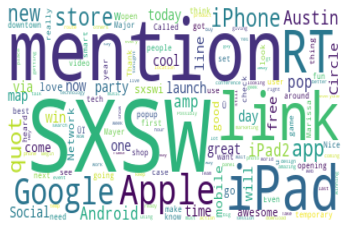

In [75]:
from wordcloud import WordCloud

wordcloud_positive = WordCloud(collocations=False,background_color="white", max_words=150).generate(Positive)

# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Negative

Create word cloud for negative tweets.

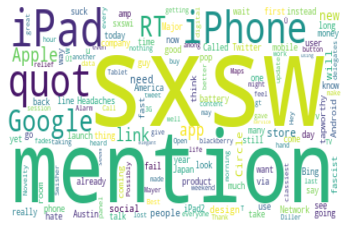

In [76]:
wordcloud_negative = WordCloud(collocations=False,background_color="white", max_words=150).generate(Negative)

# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Neutral

Create word cloud for neutral tweets.

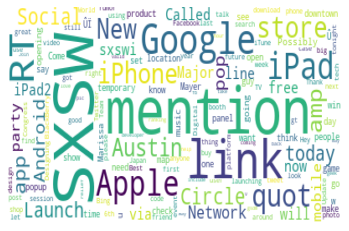

In [77]:
wordcloud_neutral = WordCloud(collocations=False,background_color="white", max_words=150).generate(Neutral)

# Display the generated image:
plt.imshow(wordcloud_neutral, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

# Train Test Split

Perform a train test split on our cleaned data prior to utilizing natural language processing tools.

In [78]:
from sklearn.model_selection import train_test_split

X = data.drop("is_there_an_emotion_directed_at_a_brand_or_product", axis = 1)
y = data["is_there_an_emotion_directed_at_a_brand_or_product"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

# Standardizing

Standardize the data so the tweets can be read properly in the models.

In [79]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['tweet_text']=X_train['tweet_text'].map(lambda s:preprocess(s))
X_test['tweet_text']=X_test['tweet_text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-79-37abe8c391c6>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['tweet_text']=X_train['tweet_text'].map(lambda s:preprocess(s))
<ipython-input-79-37abe8c391c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['tweet_text']=X_test['tweet_text'].map(lambda s:preprocess(s))


Check the function created on a random tweet to see if it has been cleaned to our liking.

In [80]:
X_train.iloc[100]["tweet_text"]

'google hotpot demo sxsw seems whole lot like yelp innovate left outa game show heat maps link'

# Tokenizer

After standardizing our data we want to tokenize the 'tweet_text' column in both our X_train and X_test.

In [81]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

In [82]:
X_train["text_tokenized"] = X_train["tweet_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["tweet_text"].apply(tokenizer.tokenize)

<ipython-input-82-980beecedbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["tweet_text"].apply(tokenizer.tokenize)
<ipython-input-82-980beecedbf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["tweet_text"].apply(tokenizer.tokenize)


Check to see if the data has been tokenized on a random tweet from the dataset.

In [83]:
X_train.iloc[100]["text_tokenized"][:20]

['google',
 'hotpot',
 'demo',
 'sxsw',
 'seems',
 'whole',
 'lot',
 'like',
 'yelp',
 'innovate',
 'left',
 'outa',
 'game',
 'show',
 'heat',
 'maps',
 'link']

## Exploratory Data Analysis: Frequency Distributions

Now that the data has been standardized and tokenized we can look at frequency distributions within our dataset.  First we will look at the frequency on one tweet and then we will utilize the function on the entire dataset.

In [84]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'google': 1, 'hotpot': 1, 'demo': 1, 'sxsw': 1, 'seems': 1, 'whole': 1, 'lot': 1, 'like': 1, 'yelp': 1, 'innovate': 1, ...})

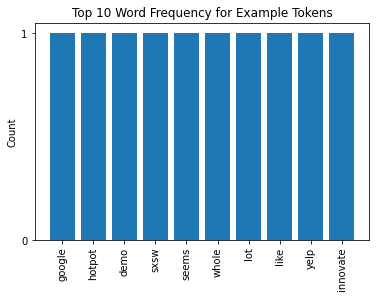

In [85]:
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

## Visualizing the Frequency Distribution for the Full Dataset

Now that we know our function works we will look at the frequency of the entire dataset.

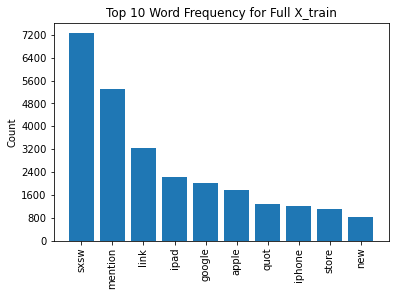

In [86]:
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

# Baseline Model with TfidVectorizer and MultinomialNB

After our data has been cleaned we are ready to start modeling.  We can now utilize TF-IDF Vectorizer followed by building our first baseline model with MultinomialNB

## TfidfVectorizer

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X_train_vectorized = tfidf.fit_transform(X_train["tweet_text"])
X_test_vectorized = tfidf.transform(X_test["tweet_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,able,abt,acc,access,aclu,across,action,actually,added,agchat,...,years,yelp,yep,yes,yesterday,yet,yrs,zazzlesxsw,zlf,ûªs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

assert X_train_vectorized.shape[1] == 1000

## MultinomialNB

Build baseline model with MultinomialNB

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

baseline_model = MultinomialNB()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.65469208, 0.65322581, 0.67155425, 0.65469208, 0.67131328])

In [90]:
y_train.value_counts(normalize=True)

1    0.609767
2    0.327467
0    0.062766
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

In [91]:
from sklearn.metrics import classification_report

baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.05      0.09       142
           1       0.67      0.92      0.77      1387
           2       0.64      0.31      0.42       745

    accuracy                           0.66      2274
   macro avg       0.73      0.43      0.43      2274
weighted avg       0.67      0.66      0.61      2274



## MultinomialNB Model 2

Build version two of our MultinomialNB.

### Using Custom Tokens

In [93]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [94]:
print("Original sample:", X_train.iloc[100]["tweet_text"][1:])
print("Stemmed sample: ", stem_and_tokenize(X_train.iloc[100]["tweet_text"])[1:])

Original sample: oogle hotpot demo sxsw seems whole lot like yelp innovate left outa game show heat maps link
Stemmed sample:  ['hotpot', 'demo', 'sxsw', 'seem', 'whole', 'lot', 'like', 'yelp', 'innov', 'left', 'outa', 'game', 'show', 'heat', 'map', 'link']


In [95]:
tfidf = TfidfVectorizer(
    max_features=1000,
    tokenizer=stem_and_tokenize
)

X_train_vectorized_2 = tfidf.fit_transform(X_train["tweet_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_2, columns=tfidf.get_feature_names())

,abl,abt,acc,access,account,aclu,across,action,actsofshar,actual,...,yelp,yep,yes,yesterday,yet,yourmom,yrs,zazzlesxsw,zlf,ûªs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized_2, y_train)
stemmed_cv

array([0.66935484, 0.65762463, 0.66129032, 0.65835777, 0.67644901])

In [97]:
print("Stemmed:", stemmed_cv.mean())

Stemmed: 0.6646153151040377


In [98]:
baseline_model.fit(X_train_vectorized_2, y_train)
y_pred_2 = baseline_model.predict(X_test_vectorized)

In [99]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.04      0.01      0.01       142
           1       0.59      0.77      0.67      1387
           2       0.26      0.16      0.20       745

    accuracy                           0.52      2274
   macro avg       0.30      0.31      0.29      2274
weighted avg       0.45      0.52      0.47      2274



# Second Model with Random Forest

Build second model with Random Forest using default parameters.

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

rf_baseline = -cross_val_score(rf_baseline_model, X_train_vectorized, y_train, scoring="neg_log_loss").mean()
rf_baseline

0.855905823225374

In [101]:
rf_baseline_model.fit(X_train_vectorized, y_train)
y_pred_rf = rf_baseline_model.predict(X_test_vectorized)

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.19      0.30       142
           1       0.69      0.87      0.77      1387
           2       0.60      0.40      0.48       745

    accuracy                           0.67      2274
   macro avg       0.67      0.49      0.52      2274
weighted avg       0.66      0.67      0.65      2274



In [103]:
rf_grid = { 
    'n_estimators': [100, 200, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7],
    'criterion' :['gini', 'entropy']
}

In [104]:
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(estimator=rf_baseline_model,
                              param_grid=rf_grid, cv=5, n_jobs=1)

In [105]:
rf_grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 1000]})

In [106]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

## Random Forest Model 2

Build a second model with Random Forest but utilizing best parameters

In [107]:
rf_model_2 = RandomForestClassifier(criterion='gini',
                                    max_depth=7,
                                    max_features='auto',
                                    n_estimators=100)
rf_model_2.fit(X_train_vectorized, y_train)
y_pred_rf2 = rf_model_2.predict(X_test_vectorized)
print("neg_log_loss", rf_model_2.score(X_test_vectorized, y_test))

neg_log_loss 0.6196130167106421


In [108]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.62      1.00      0.76      1387
           2       0.88      0.03      0.06       745

    accuracy                           0.62      2274
   macro avg       0.50      0.34      0.27      2274
weighted avg       0.67      0.62      0.48      2274



/Users/henryvangorp/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Third Model XG Boost

Build third model utilizing XG Boost.

In [109]:
from xgboost import XGBClassifier

xgb_baseline_model = XGBClassifier()

xgb_baseline_log_loss = -cross_val_score(xgb_baseline_model, X_train_vectorized, y_train, scoring="neg_log_loss").mean()
xgb_baseline_log_loss

0.7312243113760778

In [110]:
xgb_baseline_model.fit(X_train_vectorized, y_train)
y_pred_XG = xgb_baseline_model.predict(X_test_vectorized)

In [111]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           0       0.58      0.13      0.22       142
           1       0.69      0.89      0.78      1387
           2       0.63      0.39      0.48       745

    accuracy                           0.68      2274
   macro avg       0.63      0.47      0.49      2274
weighted avg       0.66      0.68      0.65      2274



## XG Boost Model 2

Build second model of XG Boost but utilizing best paramters.

In [112]:
xgb_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [113]:
xgb_grid_search = GridSearchCV(estimator=xgb_baseline_model,
                               param_grid=xgb_grid, cv=5, n_jobs=1)

In [114]:
xgb_grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                      

In [115]:
xgb_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.7}

In [116]:
xgb_model_2 = XGBClassifier(learning_rate=0.2,
                                    min_child_weight=2,
                                    max_depth=6,
                                    subsample=0.7,
                                    n_estimators=100)
xgb_model_2.fit(X_train_vectorized, y_train)
y_pred_XG2 = xgb_model_2.predict(X_test_vectorized)
print("neg_log_loss", xgb_model_2.score(X_test_vectorized, y_test))

neg_log_loss 0.679419525065963


In [117]:
print(classification_report(y_test, y_pred_XG2))

              precision    recall  f1-score   support

           0       0.53      0.11      0.19       142
           1       0.69      0.90      0.78      1387
           2       0.64      0.38      0.48       745

    accuracy                           0.68      2274
   macro avg       0.62      0.46      0.48      2274
weighted avg       0.66      0.68      0.64      2274



# Best Model

The best fit model is the Random Forest model.  This model has an accuracy of 0.68 with good precision scores.

In [118]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.19      0.30       142
           1       0.69      0.87      0.77      1387
           2       0.60      0.40      0.48       745

    accuracy                           0.67      2274
   macro avg       0.67      0.49      0.52      2274
weighted avg       0.66      0.67      0.65      2274



## Confusion Matrix

A confusion matrix was done on the best fit model as well as another model to showcase that their are multiple models which performed well which can be utilized moving forward as more data is collected.

### Confusion Matrix of Best Model

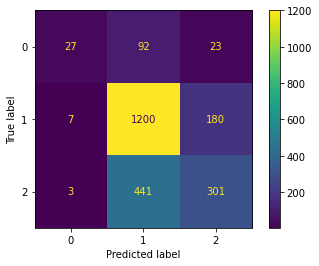

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_baseline_model, X_test_vectorized, y_test)

### Confusion Matrix on XG Boost with Default Paramters

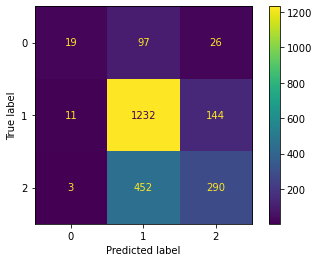

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_baseline_model, X_test_vectorized, y_test)

# Conclusion

The best fit model was built with Random Forest. This model will accurately predict the emotion of a tweet 67% of the time.

There was a huge class imbalance causing Class 0 (negative emotion) to perform poorly.  Class 1 (neutral emotion) performed the best in the final model.

It is recommended to utilize this in showcasing another way in which companies can benefit from the South By Southwest conference.  Specifically technology based companies.

It is also recommended to utilize this model with more data to increase the scores.